In [1]:
from imagenet_dataset import get_dataset
from retina_env import RetinaEnv, calculate_retinal_filter
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import types

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
config = types.SimpleNamespace()
config.batch_size = 32
config.margin = 20
config.image_h = 224
config.image_w = 224
config.image_hm = config.image_h+2*config.margin
config.image_wm = config.image_w+2*config.margin
config.foveate = None
config.do_grayscale = True
config.history_length = 16
config.t_ignore = 16
config.t_max =50
config.motion_mode = 'velocity'

t_vec = np.linspace(0,150,16)

balanced_filter = calculate_retinal_filter(t_vec, R=1.0)
config.filter = balanced_filter.reshape([1,1,-1,1])
config.min_freq = 1
config.max_freq = 13
config.action_upper_bound = np.array([2.0, 2.0])

In [3]:
dataset_dir = '/home/bnapp/datasets/tensorflow_datasets/imagenet2012/5.0.0/'

dataset = get_dataset(dataset_dir,
                                     'validation',
                                     config.batch_size,
                                     image_h = config.image_hm,
                                     image_w = config.image_wm,
                                     preprocessing='identity',
                                     rggb_mode=False,
                                     central_squeeze_and_pad_factor=-1)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


2023-06-05 10:28:55.819474: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1917] Ignoring visible gpu device (device: 1, name: NVIDIA GeForce GT 730, pci bus id: 0000:65:00.0, compute capability: 3.5) with core count: 2. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2023-06-05 10:28:56.245106: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10247 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:17:00.0, compute capability: 6.1


In [4]:

env = RetinaEnv(config,image_generator=dataset)

In [13]:
env.reset()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
this_game_name = 'gaussian_x1p5'
coordinates = np.zeros((config.batch_size,2)) 
origins_offset = np.array([[config.image_hm//2,config.image_wm//2]])
done = False
while not done:
    action = 1*np.random.normal(size=(config.batch_size,2))
    observation, reward, done, info = env.step(action)
    print('step reward', reward)

step reward tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32)
step reward tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32)
step reward tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32)
step reward tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32)
step reward 

step reward tf.Tensor(
[-0.20077898 -0.1648277  -0.50975019 -0.47988823 -0.60165595 -0.09749535
 -0.37091746 -0.16460966 -0.45310053 -0.11892866 -0.10774188 -0.24040213
 -0.15140401 -0.65245672 -0.32365871 -0.24167812 -0.1110307  -0.27847786
 -0.55755555 -0.09203874 -0.47552713 -0.29319347 -0.16586828 -0.11846299
 -0.4973429  -0.13603408 -0.70108102 -0.30505509 -0.29461766 -0.26774887
 -0.41815269 -0.39851397], shape=(32,), dtype=float64)
step reward tf.Tensor(
[-0.20051935 -0.16176876 -0.50711147 -0.484774   -0.60816037 -0.10069705
 -0.36937059 -0.16884374 -0.45852533 -0.12465947 -0.11195058 -0.24047386
 -0.14982458 -0.65283328 -0.31870489 -0.24826931 -0.11217258 -0.27474597
 -0.55662989 -0.09077351 -0.4729772  -0.290859   -0.16023876 -0.11621453
 -0.49519142 -0.13750654 -0.6962315  -0.30516447 -0.29150289 -0.26097904
 -0.41923208 -0.39631038], shape=(32,), dtype=float64)
step reward tf.Tensor(
[-0.20043828 -0.16091214 -0.50403632 -0.4851867  -0.61034642 -0.10522521
 -0.36798405 -0.17

step reward tf.Tensor(
[-0.26011493 -0.14292952 -0.48728168 -0.51290747 -0.70915388 -0.15536826
 -0.36956315 -0.164687   -0.46642725 -0.12409279 -0.10470433 -0.26569658
 -0.14941569 -0.64506509 -0.34361618 -0.26659157 -0.15387439 -0.31014876
 -0.64796414 -0.0971758  -0.45300996 -0.25232606 -0.12655449 -0.10615088
 -0.48762844 -0.2196428  -0.70008436 -0.37221484 -0.3038652  -0.28816843
 -0.5901914  -0.37761062], shape=(32,), dtype=float64)
step reward tf.Tensor(
[-0.25963286 -0.14260656 -0.48603253 -0.51079481 -0.70503667 -0.15839458
 -0.36863286 -0.1628605  -0.46510023 -0.12119167 -0.10345109 -0.26502674
 -0.15163416 -0.64671367 -0.34489105 -0.26737854 -0.15353703 -0.30620862
 -0.65267183 -0.11098565 -0.450748   -0.24913061 -0.12703299 -0.10598043
 -0.49069516 -0.21909091 -0.70042104 -0.37172183 -0.31649471 -0.28766847
 -0.58751829 -0.3770553 ], shape=(32,), dtype=float64)
step reward tf.Tensor(
[-0.25994441 -0.14177559 -0.48704196 -0.50951147 -0.70103825 -0.16078465
 -0.36790477 -0.16

In [15]:
retinal_view, cumulative_spectral_density, location_history, timestep = env.unflatten_observation(observation)

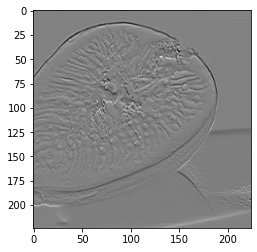

In [16]:
plt.imshow(retinal_view[-3],cmap='gray')

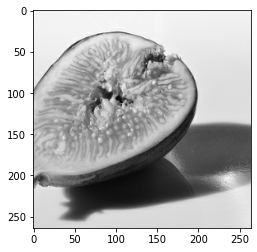

In [17]:
plt.imshow(env.images[-3],cmap='gray')

In [10]:
timestep

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.],
       [50.]], dtype=float32)>

In [11]:
coordinates_history[1,:,:]

NameError: name 'coordinates_history' is not defined

In [ ]:
coordinates_history.shape

In [ ]:
np.var(coordinates_history.numpy(),axis=0)